In [6]:
import wbdata
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.ensemble import ExtraTreesClassifier
import statistics
from geopy.geocoders import Nominatim
import math
import folium
from folium.plugins import HeatMap

In [7]:
url = 'https://www.worldometers.info/coronavirus/'
requests.get(url)
wdweb = requests.get(url)

In [8]:
wdweb

<Response [200]>

In [9]:
wdwebsoup = BeautifulSoup(wdweb.text, 'lxml')

In [10]:
wdwebtable_data = wdwebsoup.find('table', id = 'main_table_countries_yesterday')

In [11]:
headers = []
for i in wdwebtable_data.find_all('th'):
    title = i.text
    headers.append(title)

In [12]:
covid = pd.DataFrame(columns = headers)

In [13]:
for j in wdwebtable_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [td.text for td in row_data]
        length = len(covid)
        covid.loc[length] = row

In [14]:
covid.columns = ['ID','country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecov','NewRecov','ActiveCases','SeriousCritical','TotalCases1M','TotalDeaths1M','TotalTests','TotalTests1M','Population','Continent','1CaseEvery','1DeathEvery','1TestEvery']
covid.set_index('country', inplace=True, drop=True)

In [15]:
covid.shape

(233, 18)

In [16]:
covid.index


Index(['\nAsia\n', '\nNorth America\n', '\nSouth America\n', '\nEurope\n',
       '\nAfrica\n', '\nOceania\n', '\n\n', 'World', 'China', 'USA',
       ...
       'Anguilla', 'Wallis and Futuna', 'Total:', 'Total:', 'Total:', 'Total:',
       'Total:', 'Total:', 'Total:', 'Total:'],
      dtype='object', name='country', length=233)

In [17]:
pd.set_option('display.max_rows', None)
covid.index=covid.index.str.replace("\n","")
covid=covid.rename(index={'USA': 'United States'})

In [18]:
data_date = datetime.datetime(2018, 12, 31), datetime.datetime(2018, 12, 31)
# countries = [i['id'] for i in wbdata.get_country(incomelevel='HIC')]
indicators = {"EG.ELC.ACCS.ZS":"AccessElectricity", "NY.GDP.MKTP.CD":"GDP", 
             "NY.GDP.PCAP.CD":"GDPperCap", "SH.XPD.CHEX.PC.CD":"HealthExpenseperCap", 
              "IT.NET.USER.ZS":"IndividUsingInternet", "SP.DYN.LE00.IN":"LifeExpect", 
              "SH.MED.PHYS.ZS":"DrsPer1k", "GB.XPD.RSDV.GD.ZS":"RDExpen", 
              "SH.HIV.INCD":"NewInfecHIV", "SP.DYN.TFRT.IN":"FertilityRate",
             "per_si_allsi.cov_pop_tot":"CovSocialInsurance", 
             "SP.URB.TOTL":"UrbanPopulation", "SP.URB.TOTL.IN.ZS":"UrbanPopulationPerc"}
wbdf = wbdata.get_dataframe(indicators, country="all", data_date=data_date)

In [19]:
covidandwb_merged = pd.merge(covid,wbdf, on=["country"])

In [20]:
covidandwb_merged

,ID,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecov,NewRecov,ActiveCases,SeriousCritical,TotalCases1M,...,HealthExpenseperCap,IndividUsingInternet,LifeExpect,DrsPer1k,RDExpen,NewInfecHIV,FertilityRate,CovSocialInsurance,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
North America,,"10,642,154","+71,747","343,772",+957,"7,072,958","+40,418","3,225,424","20,080",,...,None,88.498903,78.886891,NaN,2.739569,NaN,1.706032,NaN,2.989531e+08,82.173045
World,,"43,325,796","+406,560","1,158,916","+4,498","31,896,570","+235,997","10,270,310","77,748","5,558",...,None,NaN,72.563274,NaN,2.273640,1400000.0,2.414975,NaN,4.195080e+09,55.270426
China,1,"85,790",+15,"4,634",,"80,891",+15,265,3,60,...,None,NaN,76.704000,NaN,2.185680,NaN,1.690000,NaN,8.238276e+08,59.152000
United States,2,"8,889,179","+60,889","230,510",+442,"5,772,498","+30,887","2,886,171","16,377","26,805",...,None,88.498903,78.539024,NaN,2.837660,33000.0,1.729500,NaN,2.687201e+08,82.256000
India,3,"7,909,050","+45,158","119,030",+463,"7,133,994","+58,271","656,026","8,944","5,713",...,None,20.081300,69.416000,0.8571,0.649980,NaN,2.222000,NaN,4.602957e+08,34.030000
Brazil,4,"5,394,128","+12,904","157,163",+237,"4,835,915","+18,017","401,050","8,318","25,320",...,None,70.434283,75.672000,2.1643,NaN,NaN,1.730000,30.869548,1.813355e+08,86.569000
France,6,"1,138,507","+52,010","34,761",+116,"110,322",+836,"993,424","2,500","17,430",...,None,82.043187,82.724390,3.2672,2.200020,NaN,1.880000,NaN,5.387006e+07,80.444000
Spain,7,"1,110,372",,"34,752",,N/A,N/A,N/A,"2,031","23,746",...,None,86.107236,83.431707,NaN,1.237000,2600.0,1.260000,NaN,3.758842e+07,80.321000
Argentina,8,"1,090,589","+9,253","28,896",+283,"894,819","+13,706","166,874","4,863","24,060",...,None,NaN,76.520000,NaN,NaN,5100.0,2.261000,31.376911,4.087710e+07,91.870000


In [16]:
covidandwb_merged.shape

(171, 31)

In [21]:
covidandwb = covidandwb_merged

In [22]:
covidandwb = covidandwb.drop(["NewCases", "NewDeaths", "TotalRecov", "NewRecov", 
                              "ActiveCases", "SeriousCritical"], axis=1)
covidandwb = covidandwb.drop(["World"], axis=0)
covidandwb = covidandwb.drop(["North America"], axis=0)

In [23]:
covidandwb

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,HealthExpenseperCap,IndividUsingInternet,LifeExpect,DrsPer1k,RDExpen,NewInfecHIV,FertilityRate,CovSocialInsurance,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
China,1,"85,790","4,634",60,3,"160,000,000","111,163","1,439,323,776",Asia,"16,777",...,None,NaN,76.704000,NaN,2.18568,NaN,1.6900,NaN,823827650.0,59.152
United States,2,"8,889,179","230,510","26,805",695,"133,229,328","401,751","331,621,597",North America,37,...,None,88.498903,78.539024,NaN,2.83766,33000.0,1.7295,NaN,268720071.0,82.256
India,3,"7,909,050","119,030","5,713",86,"102,523,469","74,061","1,384,308,221",Asia,175,...,None,20.081300,69.416000,0.8571,0.64998,NaN,2.2220,NaN,460295677.0,34.030
Brazil,4,"5,394,128","157,163","25,320",738,"21,900,000","102,797","213,040,452",South America,39,...,None,70.434283,75.672000,2.1643,NaN,NaN,1.7300,30.869548,181335507.0,86.569
France,6,"1,138,507","34,761","17,430",532,"14,880,040","227,803","65,319,785",Europe,57,...,None,82.043187,82.724390,3.2672,2.20002,NaN,1.8800,NaN,53870058.0,80.444
Spain,7,"1,110,372","34,752","23,746",743,"15,503,165","331,543","46,760,593",Europe,42,...,None,86.107236,83.431707,NaN,1.23700,2600.0,1.2600,NaN,37588424.0,80.321
Argentina,8,"1,090,589","28,896","24,060",637,"2,823,654","62,295","45,327,446",South America,42,...,None,NaN,76.520000,NaN,NaN,5100.0,2.2610,31.376911,40877099.0,91.870
Colombia,9,"1,015,885","30,154","19,898",591,"4,748,744","93,013","51,054,737",South America,50,...,None,64.126377,77.109000,2.1848,0.23699,10000.0,1.8070,10.730555,40105215.0,80.778
Peru,10,"888,715","34,149","26,836","1,031","4,390,402","132,574","33,116,739",South America,37,...,None,55.054334,76.516000,NaN,0.12704,3200.0,2.2540,NaN,24921870.0,77.907


In [24]:
TotalDeathsindex = covidandwb[covidandwb['TotalDeaths'].str.match(' ')].index
covidandwb.loc[TotalDeathsindex, 'TotalDeaths'] = 0
covidandwb['TotalDeaths']=covidandwb['TotalDeaths'].str.replace(",","").astype(float)
covidandwb.loc[TotalDeathsindex, 'TotalDeaths1M'] = 0
covidandwb['TotalDeaths1M']=covidandwb['TotalDeaths1M'].str.replace(",","").astype(float)
covidandwb['TotalCases1M']=covidandwb['TotalCases1M'].str.replace(",","").astype(float)
covidandwb['TotalCases']=covidandwb['TotalCases'].str.replace(",","").astype(float)

In [25]:
covidandwb.head()

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,HealthExpenseperCap,IndividUsingInternet,LifeExpect,DrsPer1k,RDExpen,NewInfecHIV,FertilityRate,CovSocialInsurance,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
China,1,85790.0,4634.0,60.0,3.0,"160,000,000","111,163","1,439,323,776",Asia,"16,777",...,None,NaN,76.704000,NaN,2.18568,NaN,1.6900,NaN,823827650.0,59.152
United States,2,8889179.0,230510.0,26805.0,695.0,"133,229,328","401,751","331,621,597",North America,37,...,None,88.498903,78.539024,NaN,2.83766,33000.0,1.7295,NaN,268720071.0,82.256
India,3,7909050.0,119030.0,5713.0,86.0,"102,523,469","74,061","1,384,308,221",Asia,175,...,None,20.081300,69.416000,0.8571,0.64998,NaN,2.2220,NaN,460295677.0,34.030
Brazil,4,5394128.0,157163.0,25320.0,738.0,"21,900,000","102,797","213,040,452",South America,39,...,None,70.434283,75.672000,2.1643,NaN,NaN,1.7300,30.869548,181335507.0,86.569
France,6,1138507.0,34761.0,17430.0,532.0,"14,880,040","227,803","65,319,785",Europe,57,...,None,82.043187,82.724390,3.2672,2.20002,NaN,1.8800,NaN,53870058.0,80.444


In [22]:
covidandwb.dtypes

ID                       object
TotalCases              float64
TotalDeaths             float64
TotalCases1M            float64
TotalDeaths1M           float64
TotalTests               object
TotalTests1M             object
Population               object
Continent                object
1CaseEvery               object
1DeathEvery              object
1TestEvery               object
AccessElectricity       float64
GDP                     float64
GDPperCap               float64
HealthExpenseperCap      object
IndividUsingInternet    float64
LifeExpect              float64
DrsPer1k                float64
RDExpen                 float64
NewInfecHIV             float64
FertilityRate           float64
CovSocialInsurance      float64
UrbanPopulation         float64
UrbanPopulationPerc     float64
dtype: object

In [26]:
covidandwb['1DeathEvery']= covidandwb['1DeathEvery'].str.replace(",","")
covidandwb['1DeathEvery']=covidandwb['1DeathEvery'].str.replace(r'^\s*$','NaN')
covidandwb['1DeathEvery']=covidandwb['1DeathEvery'].astype(float)

In [27]:
covidandwb['TotalTests']= covidandwb['TotalTests'].str.replace(",","")
covidandwb['TotalTests']=covidandwb['TotalTests'].str.replace(r'^\s*$','NaN')
covidandwb['TotalTests']=covidandwb['TotalTests'].astype(float)

In [28]:
covidandwb['TotalTests1M']= covidandwb['TotalTests1M'].str.replace(",","")
covidandwb['TotalTests1M']=covidandwb['TotalTests1M'].str.replace(r'^\s*$','NaN')
covidandwb['TotalTests1M']=covidandwb['TotalTests1M'].astype(float)

In [29]:
covidandwb['Population']= covidandwb['Population'].str.replace(",","")
covidandwb['Population']=covidandwb['Population'].str.replace(r'^\s*$','NaN')
covidandwb['Population']=covidandwb['Population'].astype(float)

In [30]:
covidandwb['1CaseEvery']= covidandwb['1CaseEvery'].str.replace(",","")
covidandwb['1CaseEvery']=covidandwb['1CaseEvery'].str.replace(r'^\s*$','NaN')
covidandwb['1CaseEvery']=covidandwb['1CaseEvery'].astype(float)

In [31]:
covidandwb['HealthExpenseperCap']= covidandwb['HealthExpenseperCap'].str.replace(",","")
covidandwb['HealthExpenseperCap']=covidandwb['HealthExpenseperCap'].str.replace(r'^\s*$','NaN')
covidandwb['HealthExpenseperCap']=covidandwb['HealthExpenseperCap'].astype(float)

In [32]:
covidandwb['1TestEvery']= covidandwb['1TestEvery'].str.replace(",","")
covidandwb['1TestEvery']=covidandwb['1TestEvery'].str.replace(r'^\s*$','NaN')
covidandwb['1TestEvery']=covidandwb['1TestEvery'].astype(float)

In [33]:
covidandwb.dtypes

ID                       object
TotalCases              float64
TotalDeaths             float64
TotalCases1M            float64
TotalDeaths1M           float64
TotalTests              float64
TotalTests1M            float64
Population              float64
Continent                object
1CaseEvery              float64
1DeathEvery             float64
1TestEvery              float64
AccessElectricity       float64
GDP                     float64
GDPperCap               float64
HealthExpenseperCap     float64
IndividUsingInternet    float64
LifeExpect              float64
DrsPer1k                float64
RDExpen                 float64
NewInfecHIV             float64
FertilityRate           float64
CovSocialInsurance      float64
UrbanPopulation         float64
UrbanPopulationPerc     float64
dtype: object

## Imputation Data

In [31]:
covidandwb.shape

(169, 25)

In [32]:
covidandwb.isnull().sum()

ID                        0
TotalCases                0
TotalDeaths              12
TotalCases1M              0
TotalDeaths1M            12
TotalTests               12
TotalTests1M             12
Population                0
Continent                 0
1CaseEvery                0
1DeathEvery              12
1TestEvery               12
AccessElectricity         1
GDP                      12
GDPperCap                12
HealthExpenseperCap     169
IndividUsingInternet     96
LifeExpect                9
DrsPer1k                113
RDExpen                 109
NewInfecHIV              65
FertilityRate             8
CovSocialInsurance      163
UrbanPopulation           1
UrbanPopulationPerc       1
dtype: int64

In [33]:
covidandwb.columns

Index(['ID', 'TotalCases', 'TotalDeaths', 'TotalCases1M', 'TotalDeaths1M',
       'TotalTests', 'TotalTests1M', 'Population', 'Continent', '1CaseEvery',
       '1DeathEvery', '1TestEvery', 'AccessElectricity', 'GDP', 'GDPperCap',
       'HealthExpenseperCap', 'IndividUsingInternet', 'LifeExpect', 'DrsPer1k',
       'RDExpen', 'NewInfecHIV', 'FertilityRate', 'CovSocialInsurance',
       'UrbanPopulation', 'UrbanPopulationPerc'],
      dtype='object')

Eliminamos:
* **CovSocialInsurance**
* **RDExpen**
* **HealthExpenseperCap**
* **IndividUsingInternet**

Debido a que todas ellas cuentan con más de un 60% de datos nulos

In [34]:
columns_acceptables = ['ID', 'TotalCases', 'TotalDeaths', 'TotalCases1M', 'TotalDeaths1M',
       'TotalTests', 'TotalTests1M', 'Population', 'Continent', '1CaseEvery',
       '1DeathEvery', '1TestEvery', 'AccessElectricity', 'GDP', 'GDPperCap', 'LifeExpect','DrsPer1k', 'NewInfecHIV', 'FertilityRate',
       'UrbanPopulation', 'UrbanPopulationPerc']

In [38]:
covidandwb = covidandwb[columns_acceptables]
covidandwb.isnull().sum()

ID                       0
TotalCases               0
TotalDeaths              0
TotalCases1M             0
TotalDeaths1M            0
TotalTests               0
TotalTests1M             0
Population               0
Continent                0
1CaseEvery               0
1DeathEvery              0
1TestEvery               0
AccessElectricity        0
GDP                      0
GDPperCap                0
LifeExpect               9
DrsPer1k               113
NewInfecHIV             65
FertilityRate            8
UrbanPopulation          1
UrbanPopulationPerc      1
dtype: int64

In [39]:
def imputationFunct(x, indexColumn):
    if math.isnan(x.iloc[indexColumn]):
        x.iloc[indexColumn] = statistics.median(covidandwb.loc[covidandwb['Continent'] == x.iloc[8]].iloc[:, indexColumn].dropna())
    return x.iloc[indexColumn]

In [40]:
columnsWithNaN = [2,4,5,6,10,11,12,13,14,15,16,17,18,19,20]

In [41]:
for column in columnsWithNaN:
    covidandwb.iloc[:,[column]] = covidandwb.apply(imputationFunct,axis=1,args=(column,))

/home/dsninja/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
covidandwb.isnull().sum()

ID                     0
TotalCases             0
TotalDeaths            0
TotalCases1M           0
TotalDeaths1M          0
TotalTests             0
TotalTests1M           0
Population             0
Continent              0
1CaseEvery             0
1DeathEvery            0
1TestEvery             0
AccessElectricity      0
GDP                    0
GDPperCap              0
LifeExpect             0
DrsPer1k               0
NewInfecHIV            0
FertilityRate          0
UrbanPopulation        0
UrbanPopulationPerc    0
dtype: int64

In [40]:
covidandwb.head()

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,1TestEvery,AccessElectricity,GDP,GDPperCap,LifeExpect,DrsPer1k,NewInfecHIV,FertilityRate,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
China,1,85729.0,4634.0,60.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,16789.0,...,9.0,100.000000,1.389482e+13,9976.676822,76.704000,0.9186,1050.0,1.6900,823827650.0,59.152
United States,2,8664216.0,228381.0,26128.0,689.0,129804568.0,391442.0,3.316057e+08,North America,38.0,...,3.0,100.000000,2.052905e+13,62840.020239,78.539024,1.9357,33000.0,1.7295,268720071.0,82.256
India,3,7759640.0,117336.0,5606.0,85.0,98670363.0,71283.0,1.384197e+09,Asia,178.0,...,14.0,95.235855,2.713165e+12,2005.863005,69.416000,0.8571,1050.0,2.2220,460295677.0,34.030
Brazil,4,5332634.0,155962.0,25033.0,732.0,17900000.0,84026.0,2.130281e+08,South America,40.0,...,12.0,100.000000,1.885483e+12,9001.234249,75.672000,2.1643,2300.0,1.7300,181335507.0,86.569
Spain,6,1090521.0,34521.0,23321.0,738.0,15503165.0,331544.0,4.676044e+07,Europe,43.0,...,3.0,100.000000,1.419735e+12,30337.679133,83.431707,3.4075,2600.0,1.2600,37588424.0,80.321


In [42]:
geolocator = Nominatim(user_agent='myapplication')

In [43]:
def getLatitude(x):
    return geolocator.geocode(x[0]).latitude

In [44]:
def getLongitude(x):
    return geolocator.geocode(x[0]).longitude

In [45]:
x=covidandwb.reset_index().apply(getLatitude,axis=1)

In [46]:
covidandwb.head()

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,1TestEvery,AccessElectricity,GDP,GDPperCap,LifeExpect,DrsPer1k,NewInfecHIV,FertilityRate,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
China,1,85790.0,4634.0,60.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,16777.0,...,9.0,100.000000,1.389482e+13,9976.676822,76.704000,0.9186,1050.0,1.6900,823827650.0,59.152
United States,2,8889179.0,230510.0,26805.0,695.0,133229328.0,401751.0,3.316216e+08,North America,37.0,...,2.0,100.000000,2.052905e+13,62840.020239,78.539024,1.9357,33000.0,1.7295,268720071.0,82.256
India,3,7909050.0,119030.0,5713.0,86.0,102523469.0,74061.0,1.384308e+09,Asia,175.0,...,14.0,95.235855,2.713165e+12,2005.863005,69.416000,0.8571,1050.0,2.2220,460295677.0,34.030
Brazil,4,5394128.0,157163.0,25320.0,738.0,21900000.0,102797.0,2.130405e+08,South America,39.0,...,10.0,100.000000,1.885483e+12,9001.234249,75.672000,2.1643,2300.0,1.7300,181335507.0,86.569
France,6,1138507.0,34761.0,17430.0,532.0,14880040.0,227803.0,6.531978e+07,Europe,57.0,...,4.0,100.000000,2.787864e+12,41631.090739,82.724390,3.2672,500.0,1.8800,53870058.0,80.444


In [47]:
covidandwb.iloc[:,[(len(covidandwb.columns) - 1)]] = covidandwb.apply(imputationFunct,axis=1,args=(2,))

/home/dsninja/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
covidandwb.head()

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,GDP,GDPperCap,LifeExpect,DrsPer1k,NewInfecHIV,FertilityRate,UrbanPopulation,UrbanPopulationPerc,Latitude,Longitude
country,,,,,,,,,,,,,,,,,,,,,
China,1,85729.0,4634.0,60.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,16789.0,...,1.389482e+13,9976.676822,76.704000,0.9186,1050.0,1.6900,823827650.0,59.152,0,4634.0
United States,2,8664216.0,228381.0,26128.0,689.0,129804568.0,391442.0,3.316057e+08,North America,38.0,...,2.052905e+13,62840.020239,78.539024,1.9357,33000.0,1.7295,268720071.0,82.256,0,228381.0
India,3,7759640.0,117336.0,5606.0,85.0,98670363.0,71283.0,1.384197e+09,Asia,178.0,...,2.713165e+12,2005.863005,69.416000,0.8571,1050.0,2.2220,460295677.0,34.030,0,117336.0
Brazil,4,5332634.0,155962.0,25033.0,732.0,17900000.0,84026.0,2.130281e+08,South America,40.0,...,1.885483e+12,9001.234249,75.672000,2.1643,2300.0,1.7300,181335507.0,86.569,0,155962.0
Spain,6,1090521.0,34521.0,23321.0,738.0,15503165.0,331544.0,4.676044e+07,Europe,43.0,...,1.419735e+12,30337.679133,83.431707,3.4075,2600.0,1.2600,37588424.0,80.321,0,34521.0


In [48]:
covidandwb.iloc[:,[(len(covidandwb.columns) - 1)]] = covidandwb.reset_index().apply(getLongitude,axis=1)

In [49]:
covidandwb.head()

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,1TestEvery,AccessElectricity,GDP,GDPperCap,LifeExpect,DrsPer1k,NewInfecHIV,FertilityRate,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
China,1,85790.0,4634.0,60.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,16777.0,...,9.0,100.000000,1.389482e+13,9976.676822,76.704000,0.9186,1050.0,1.6900,823827650.0,NaN
United States,2,8889179.0,230510.0,26805.0,695.0,133229328.0,401751.0,3.316216e+08,North America,37.0,...,2.0,100.000000,2.052905e+13,62840.020239,78.539024,1.9357,33000.0,1.7295,268720071.0,NaN
India,3,7909050.0,119030.0,5713.0,86.0,102523469.0,74061.0,1.384308e+09,Asia,175.0,...,14.0,95.235855,2.713165e+12,2005.863005,69.416000,0.8571,1050.0,2.2220,460295677.0,NaN
Brazil,4,5394128.0,157163.0,25320.0,738.0,21900000.0,102797.0,2.130405e+08,South America,39.0,...,10.0,100.000000,1.885483e+12,9001.234249,75.672000,2.1643,2300.0,1.7300,181335507.0,NaN
France,6,1138507.0,34761.0,17430.0,532.0,14880040.0,227803.0,6.531978e+07,Europe,57.0,...,4.0,100.000000,2.787864e+12,41631.090739,82.724390,3.2672,500.0,1.8800,53870058.0,NaN


In [50]:
covidandwb = covidandwb.reset_index()
covidandwb.head()

,country,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,...,1TestEvery,AccessElectricity,GDP,GDPperCap,LifeExpect,DrsPer1k,NewInfecHIV,FertilityRate,UrbanPopulation,UrbanPopulationPerc
0,China,1,85790.0,4634.0,60.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,...,9.0,100.000000,1.389482e+13,9976.676822,76.704000,0.9186,1050.0,1.6900,823827650.0,NaN
1,United States,2,8889179.0,230510.0,26805.0,695.0,133229328.0,401751.0,3.316216e+08,North America,...,2.0,100.000000,2.052905e+13,62840.020239,78.539024,1.9357,33000.0,1.7295,268720071.0,NaN
2,India,3,7909050.0,119030.0,5713.0,86.0,102523469.0,74061.0,1.384308e+09,Asia,...,14.0,95.235855,2.713165e+12,2005.863005,69.416000,0.8571,1050.0,2.2220,460295677.0,NaN
3,Brazil,4,5394128.0,157163.0,25320.0,738.0,21900000.0,102797.0,2.130405e+08,South America,...,10.0,100.000000,1.885483e+12,9001.234249,75.672000,2.1643,2300.0,1.7300,181335507.0,NaN
4,France,6,1138507.0,34761.0,17430.0,532.0,14880040.0,227803.0,6.531978e+07,Europe,...,4.0,100.000000,2.787864e+12,41631.090739,82.724390,3.2672,500.0,1.8800,53870058.0,NaN


In [51]:
covidandwb['Latitude'] = covidandwb.apply(getLatitude,axis=1)

In [52]:
covidandwb['Longitude'] = covidandwb.apply(getLongitude,axis=1)

In [53]:
covidandwb.head()

,country,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,...,GDP,GDPperCap,LifeExpect,DrsPer1k,NewInfecHIV,FertilityRate,UrbanPopulation,UrbanPopulationPerc,Latitude,Longitude
0,China,1,85790.0,4634.0,60.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,...,1.389482e+13,9976.676822,76.704000,0.9186,1050.0,1.6900,823827650.0,NaN,35.000074,104.999927
1,United States,2,8889179.0,230510.0,26805.0,695.0,133229328.0,401751.0,3.316216e+08,North America,...,2.052905e+13,62840.020239,78.539024,1.9357,33000.0,1.7295,268720071.0,NaN,39.783730,-100.445882
2,India,3,7909050.0,119030.0,5713.0,86.0,102523469.0,74061.0,1.384308e+09,Asia,...,2.713165e+12,2005.863005,69.416000,0.8571,1050.0,2.2220,460295677.0,NaN,22.351115,78.667743
3,Brazil,4,5394128.0,157163.0,25320.0,738.0,21900000.0,102797.0,2.130405e+08,South America,...,1.885483e+12,9001.234249,75.672000,2.1643,2300.0,1.7300,181335507.0,NaN,-10.333333,-53.200000
4,France,6,1138507.0,34761.0,17430.0,532.0,14880040.0,227803.0,6.531978e+07,Europe,...,2.787864e+12,41631.090739,82.724390,3.2672,500.0,1.8800,53870058.0,NaN,46.603354,1.888334


In [54]:
map_hooray = folium.Map([40.4166359,-3.7059988], zoom_start=3)


In [55]:
HeatMap(data=covidandwb[['Latitude','Longitude','TotalCases1M']].groupby(['Latitude','Longitude']).sum().reset_index().values.tolist()).add_to(map_hooray)


In [56]:
map_hooray

## Plots of relations

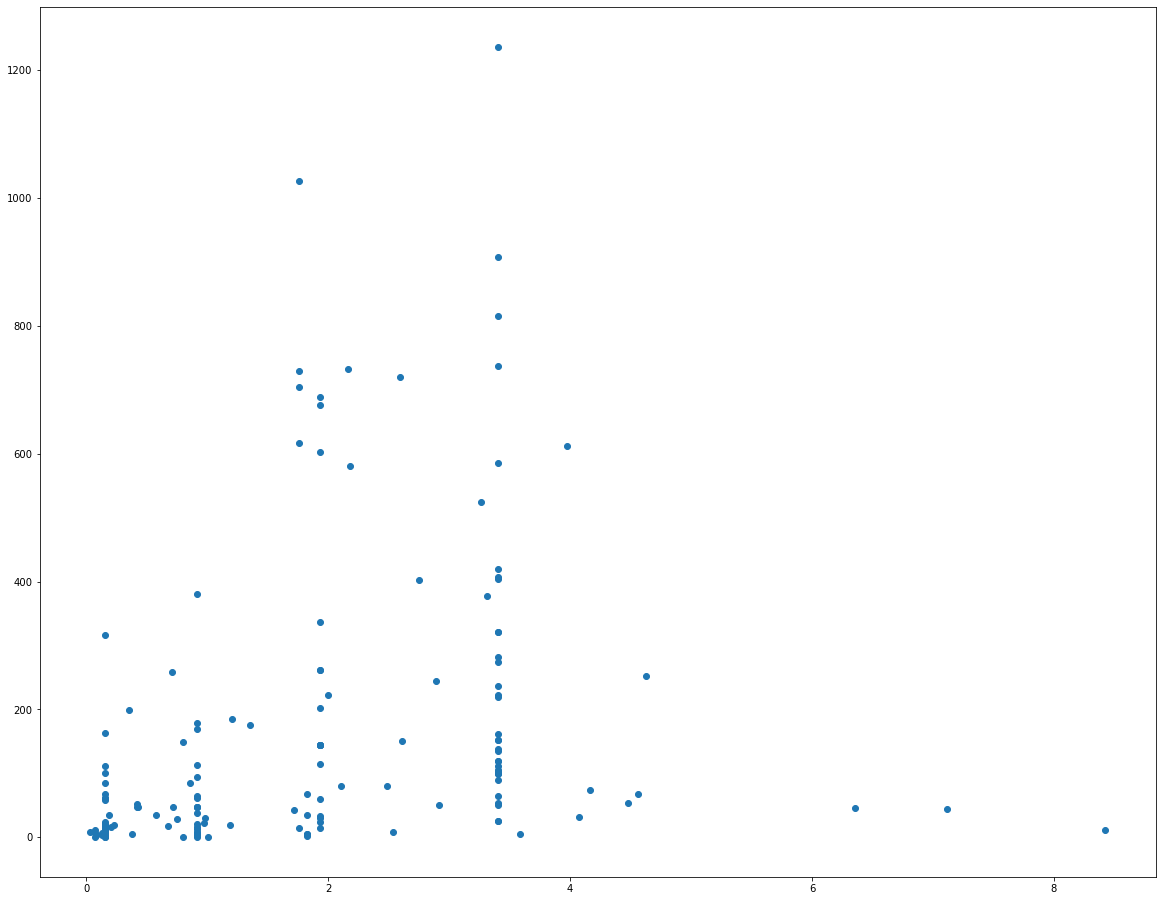

In [85]:
%matplotlib inline
rcParams['figure.figsize'] = 20,16
plt.scatter(covidandwb['DrsPer1k'], covidandwb['TotalDeaths1M'])
plt.show()

In [ ]:
# Recreamos el campo UrbanPopulationPerc

In [59]:
covidandwb['UrbanPopulationPerc'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: UrbanPopulationPerc, dtype: float64

In [61]:
def fx(x, y):
    return x*100/y
covidandwb['UrbanPopulationPerc'] = np.vectorize(fx)(covidandwb['UrbanPopulation'], covidandwb['Population'])

In [62]:
covidandwb['UrbanPopulationPerc'].head()

0    57.237132
1    81.032138
2    33.250953
3    85.117876
4    82.471273
Name: UrbanPopulationPerc, dtype: float64

In [ ]:
# Exportamos el Datframe final a CSV

In [68]:
csv_path='/home/dsninja/DataScience/WorkAreas/Anaconda/datasets/covidandwb.csv'
covidandwb.to_csv(csv_path, index=False, header=True)